In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# load model
model = tf.keras.models.load_model("my_model.keras")
print('model loaded sucessfully')

model loaded sucessfully


In [4]:
path = 'image\\685.jpg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [5]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 547
Width of the image = 729


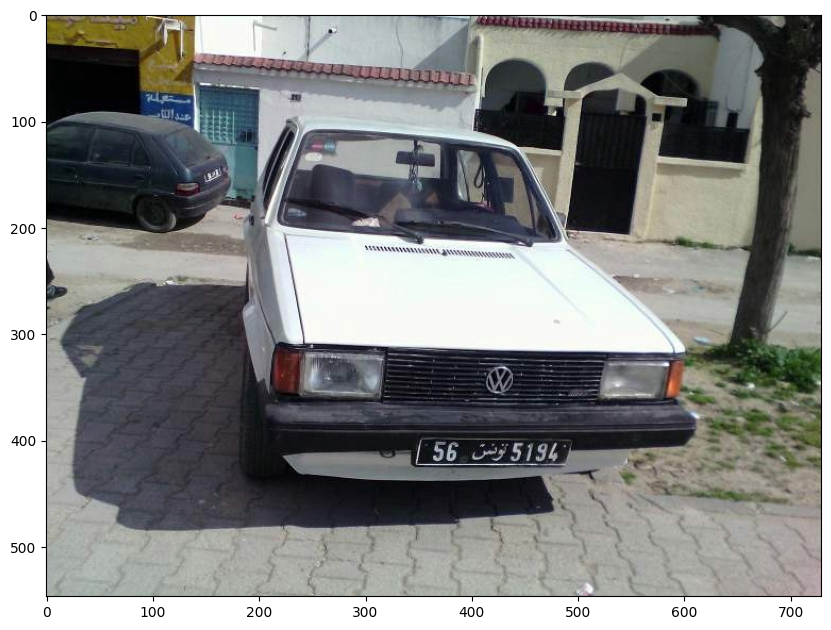

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.47992954, 0.6860728 , 0.7355748 , 0.7811403 ]], dtype=float32)

In [10]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[349.86863217, 500.14709044, 402.3594057 , 427.28375912]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[349, 500, 402, 427]])

(349, 402) (500, 427)


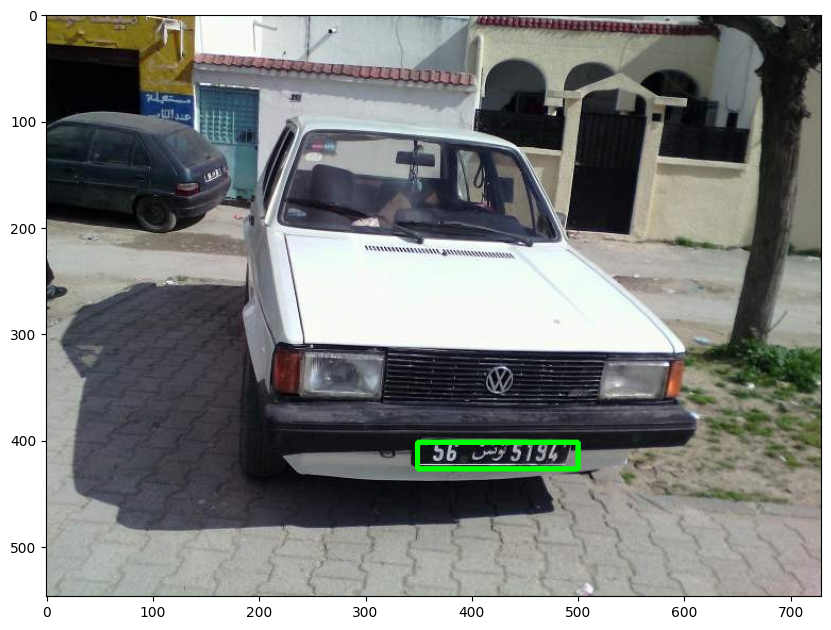

In [12]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# create pipeline

In [13]:

def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

# Test image checking

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
(242, 191) (362, 225)


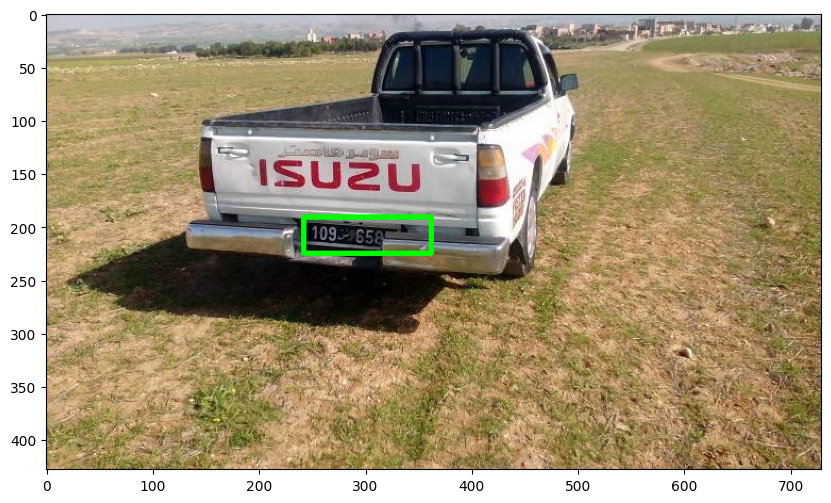

In [14]:
path = 'test\\1023.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

>Perfectly predict the Number Plat

# Optical Character Recognition - OCR

In [15]:
import pytesseract as pt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
(113, 306) (198, 336)


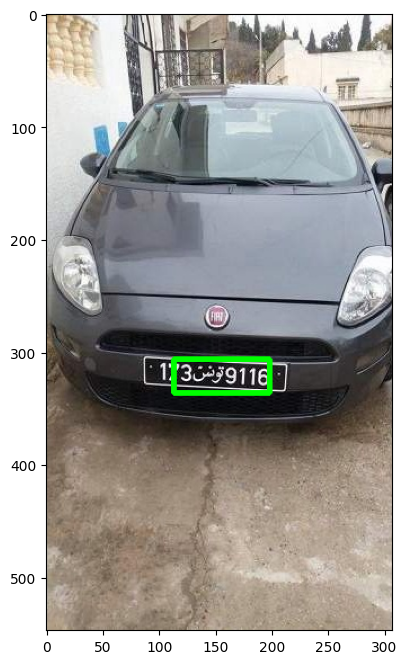

In [16]:
path = 'test\\1001.jpg'
img, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [17]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

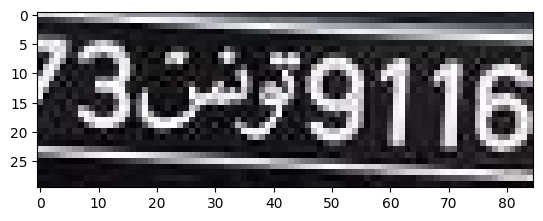

In [18]:
plt.imshow(roi)
plt.show()

In [19]:
pt.pytesseract.tesseract_cmd = r'C:\Users\jm88\AppData\Local\Tesseract-OCR\tesseract.exe'
#C:\Users\jm88\AppData\Local\Programs\Tesseract-OCR

# Number prediction

In [20]:
# Number prediction
text = pt.image_to_string(roi)
print(text)

’3.3«‘*}9116




> The above prediction predict the numbers.
> In OCR can't predict correctly if the imahe is Blur image.

# Pedict the Bonding box and Number

In [22]:

def find_text(path):
    img, cods = object_detection(path)
    img = np.array(load_img(path))
    xmin ,xmax,ymin,ymax = cods[0]
    roi = img[ymin:ymax,xmin:xmax]
    plt.imshow(roi)
    plt.show()

    pt.pytesseract.tesseract_cmd = r'C:\Users\jm88\AppData\Local\Tesseract-OCR\tesseract.exe'

    text = pt.image_to_string(roi)
    return text

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
(113, 306) (198, 336)


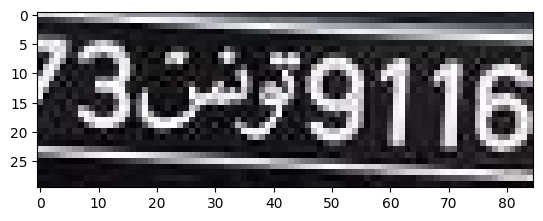

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
(113, 306) (198, 336)


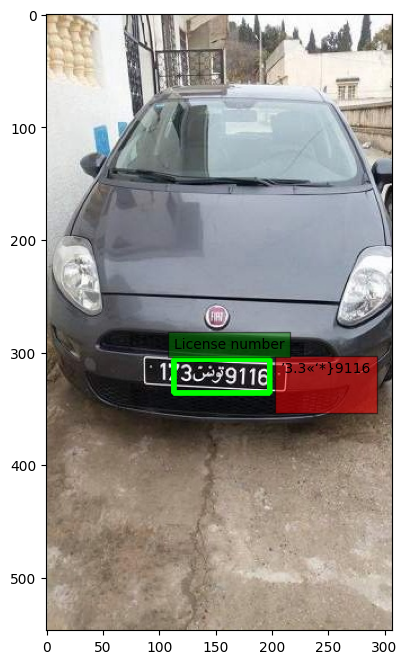

In [23]:
path = 'test\\1001.jpg'
text = find_text(path)
img, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.text(xmax+10, ymax+10, text, fontsize = 10, 
         bbox = dict(facecolor = 'red', alpha = 0.5))
plt.text(xmin, ymin-10,'License number', fontsize = 10, bbox =dict(facecolor = 'green', alpha = 0.5) )
plt.show()

> That is the Output for this test image

# END